# Приоритизация гипотез и  A/B-тест для увеличения выручки интернет-магазина

Совместно с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

# Описание данных

**Таблица hypothesis:**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Таблица orders (информация о заказах):**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Таблица visitors:**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста



## План работы: 

Шаг 1. [Приоритизация гипотез:](#step1)  

Шаг 2. [Анализ A/B-теста](#step2)

Шаг 3. [Вывод](#step3)

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot

###  Шаг 1. Приоритизация гипотез: <a id="step1"></a>   

In [2]:
#откроем файл hypothesis

hypothesis = pd.read_csv('/datasets/hypothesis.csv')

pd.set_option('display.max_colwidth', -1)
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении **ICE** топ-3 гипотезы были: 
- 'Запустить акцию, дающую скидку на товар в день рождения', 
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей', 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

При применении **RICE** топ-3 гипотезы были: 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок', 
- 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа', 
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

Изменение приоритизации произошло потому, что при рассчете **RICE** мы учли метрику **Reach**, то есть учли долю пользователей, которую затронет изменение. Однако, у обеих фрейворков в топ 3 обнаружена 2 общих гипотезы: 
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей' 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

###  Шаг 2. Анализ А/Б теста: <a id="step2"></a>   

In [5]:
#изучим датасеты orders и visitors

orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                    orders['group'] == x['group'])].agg(
                    {'date' : 'max', 
                     'group' : 'max', 
                     'transactionId' : pd.Series.nunique, 
                     'visitorId' : pd.Series.nunique, 
                     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group'])].agg({
                                      'date' : 'max', 
                                       'group' : 'max', 
                                      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Построим график кумулятивной выручки по дням и группам:**

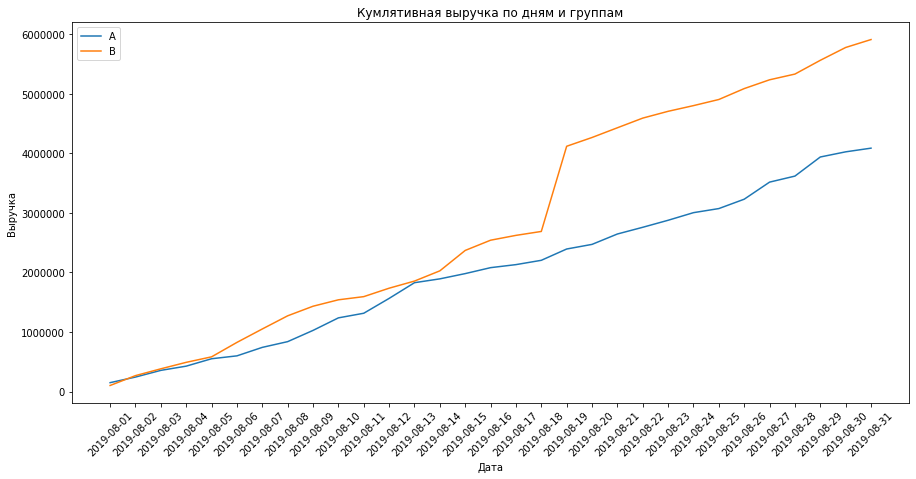

In [8]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

ax.set_title('Кумлятивная выручка по дням и группам')
ax.set(xlabel='Дата', ylabel='Выручка')
plt.legend(); 

Выручка достаточно равномерно увеличивается в течение всего теста у обоих групп.
Однако, график выручки группы В резко растет 2019-08-18, возможно это связано с очень дорогим заказом в этот день. В остальном все выглядит хорошо.

**Построим график кумулятивного среднего чека по дням и группам:**

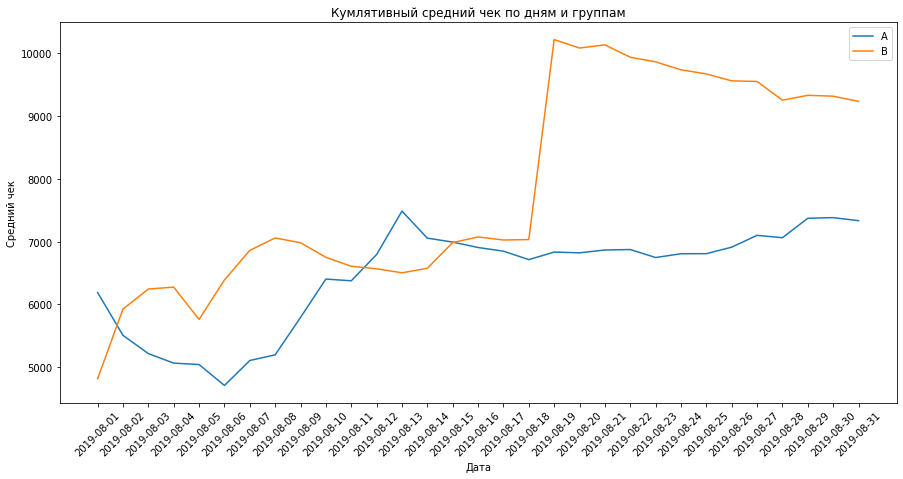

In [9]:
fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.set_title('Кумлятивный средний чек по дням и группам')
ax.set(xlabel='Дата', ylabel='Средний чек')
plt.legend();

На графиках обеих групп видны сильные колебания среднего чека. 

В период 2019-08-01 - 2019-08-10 графики ведут себя противоположным образом. 

В группе A средний чек становится более-менее равномерным (наблюдается медленный рост) после 2019-08-13, до этого наблюдается резкое снижение и зачем редкий рост среднего чека. 

График для группы B  растет неравномерно в течение всего теста, кроме того, 2019-08-18 наблюдается резкий рост. После этого график начинает плавно падать. 

Вероятно, обоим графикам нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A:**

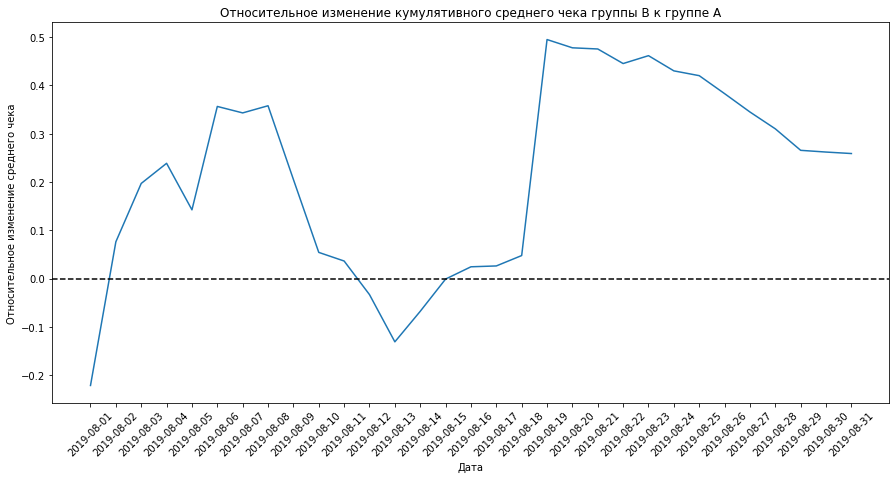

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

ax.set_title('Относительное изменение кумулятивного среднего чека группы B к группе A')
ax.set(xlabel='Дата', ylabel='Относительное изменение среднего чека')
plt.show()

График различия между сегментами часто и резко «скачет». Скорее всего причина в крупных заказах и выбросах

**Построим график кумулятивной конверсии по группам и дням:**

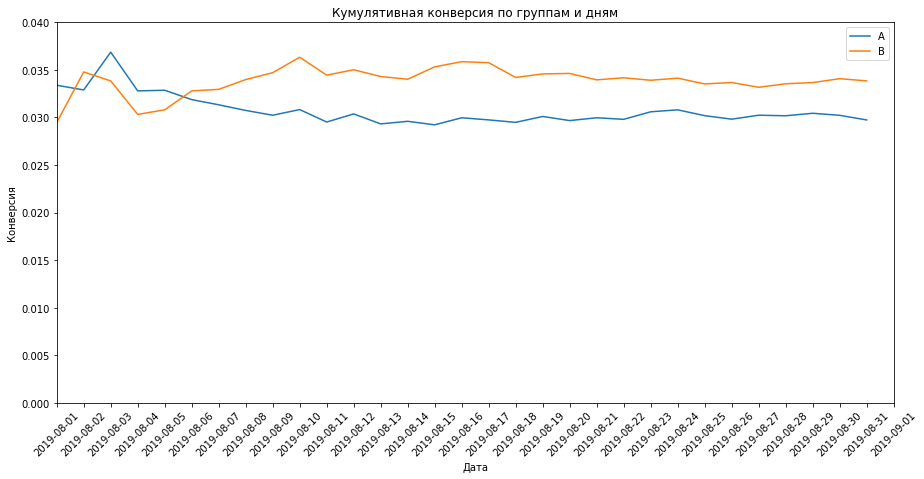

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

ax.set_title('Кумулятивная конверсия по группам и дням')
ax.set(xlabel='Дата', ylabel='Конверсия')

plt.axis(["2019-08-01", '2019-09-01', 0, 0.04])

plt.legend();

На 7 день наблюдений (после 2019-08-07) конверсия группы B вырвалась вперёд, а конверсия группы A просела. Однако, мы не можем говорить о фиксации конверсий. 
Возможно, в данных много выбросов, либо суммы заказов слишком неравномерны. 

**Построим график относительного изменения кумулятивной конверсии группы B к группе A:**

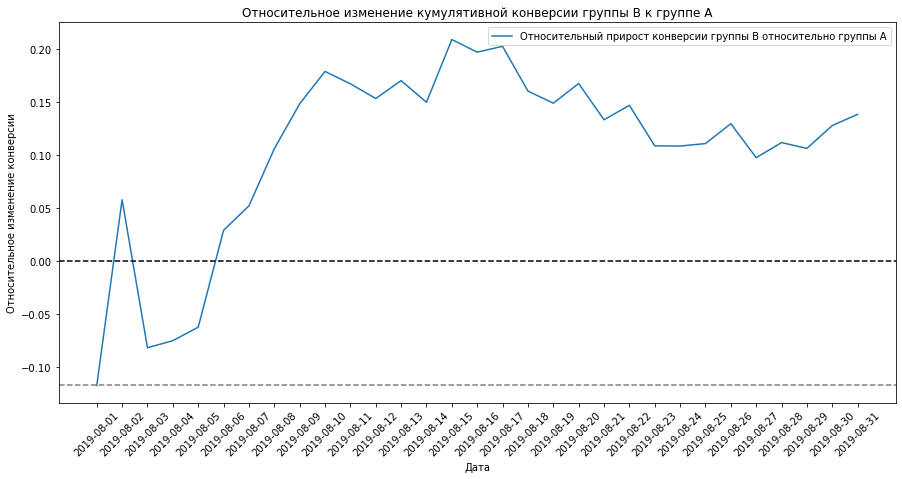

In [12]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                    left_on='date', right_on='date', how='left', 
                                                                    suffixes=['A', 'B'])

fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

ax.set_title('Относительное изменение кумулятивной конверсии группы B к группе A')
ax.set(xlabel='Дата', ylabel='Относительное изменение конверсии')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.117, color='grey', linestyle='--')

plt.legend();

В начале теста группа B проигрывала группе A, но после 2019-08-06 вырвалась вперёд, немного упала, но сейчас снова начала расти

**Построим точечный график количества заказов по пользователям:**

In [13]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Есть пользователи, которые совершали 5, 8, 9, и 11 заказов за месяц. Это значительно больше, чем количество заказов среднестатистического пользователя за неделю.

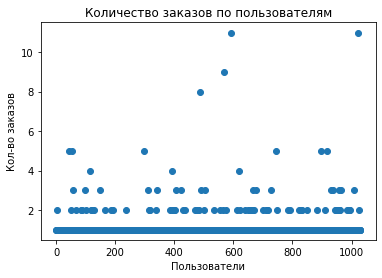

In [14]:
#Построим точечный график количества заказов по пользователям:
orders_count = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(orders_count, ordersByUsers['orders']) 

plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.title('Количество заказов по пользователям')

plt.show()

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже довольно большая. Однако, непонятно, аномалии это или нет.

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей:**

In [15]:
print('95-й перцентиль количества заказов:', np.percentile(ordersByUsers['orders'], [95])[0])
print('99-й перцентиль количества заказов:', np.percentile(ordersByUsers['orders'], [99])[0])

95-й перцентиль количества заказов: 2.0
99-й перцентиль количества заказов: 4.0


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.

Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и далее будем отсеивать аномальных пользователей по ней

**Построим точечный график стоимостей заказов:**

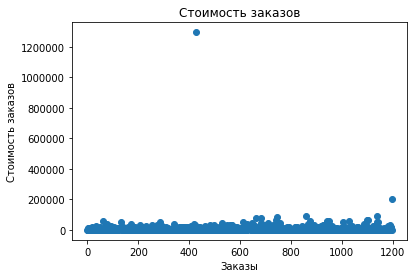

In [16]:
orders_value = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(orders_value, orders['revenue']) 

plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.title('Стоимость заказов')

plt.show()

Дорогих заказов совсем немного, стоимость большей части всех заказов не превышает 40-50 тыс. 

**Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов:**

In [17]:
print('95-й перцентиль стоимости заказов:', np.percentile(orders['revenue'], [95])[0].round(2))
print('99-й перцентиль стоимости заказов:', np.percentile(orders['revenue'], [99])[0].round(2))

95-й перцентиль стоимости заказов: 28000.0
99-й перцентиль стоимости заказов: 58233.2


Теперь видим, что не более 5% заказов дороже 28000 и не более 1% дороже 58233. За нижнюю границу возьмем 95 перцентиль

**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным**

Сформулируем нулевую и альтернативную гипотезы, которые мы будем проверять в этом тесте: 

H0 - различий в конверсии групп A и B нет.

H1 - присутствуют значимые различия в конверсии групп A и B.

In [18]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [19]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({
                                                                        'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({
                                                                        'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - 
                                                            len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - 
                                                            len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.008
0.138


По «сырым» присутствуют статистичеки значимые различия в конверсии групп A и B. 
Относительный выигрыш группы B равен 13.8%, то есть конверсия группы В выше.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:**

Сформулируем нулевую и альтернативную гипотезы, которые мы будем проверять в этом тесте: 

H0 - различий в среднем чеке групп A и B нет.

H1 - присутствуют значимые различия в среднем чеке групп A и B.

In [20]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно выше среднего чека группы A, возможно, тут замешаны выбросы.

**Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:** 


Сформулируем нулевую и альтернативную гипотезы, которые мы будем проверять в этом тесте: 

H0 - различий в конверсии групп A и B в очищенных данных нет.

H1 - присутствуют значимые различия в конверсии групп A и B в очищенных данных.

In [21]:
#сначала выделим в отдельный датафрейм аномальных пользователей: тех, кто сделал больше 2 заказов или заказал на сумму больше 28000:

usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]
                                 ['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


#очищенные выборки
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

In [22]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.007
0.173


Результаты по конверсии почти не изменились. Значит, есть статистически значимые различия в конверсии групп A и B.

Посмотрим, как выглядит график кумулятивной конверсии по очищенным данным:

In [23]:
#очистим таблицу orders и visitors
ordes_clear = orders.loc[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

# получаем агрегированные кумулятивные по дням данные о заказах по очищенным данным
clear_ordersAggregated = datesGroups.apply(lambda x: ordes_clear[np.logical_and(orders['date'] <= x['date'], 
                    orders['group'] == x['group'])].agg(
                    {'date' : 'max', 
                     'group' : 'max', 
                     'transactionId' : pd.Series.nunique, 
                     'visitorId' : pd.Series.nunique, 
                     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
clear_cumulativeData = clear_ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
clear_cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Построим график кумулятивной конверсии по дням и группам по очищенным данным:

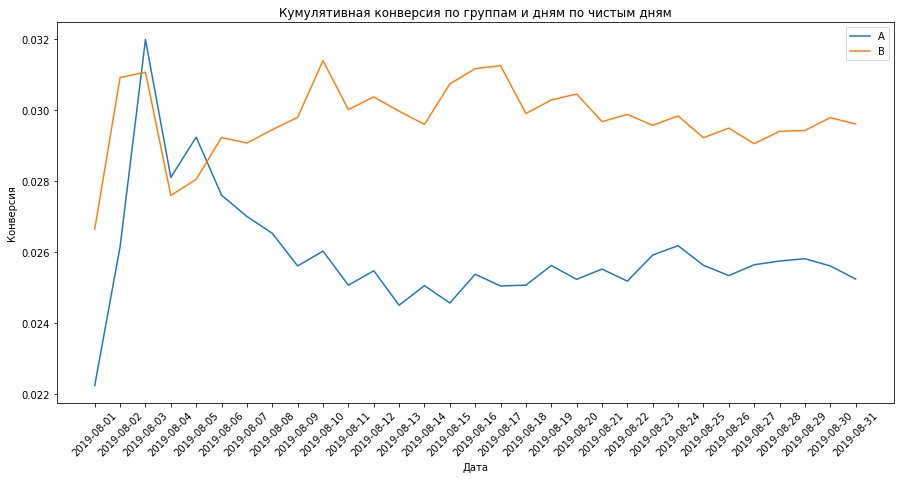

In [24]:
# считаем кумулятивную конверсию
clear_cumulativeData['conversion'] = clear_cumulativeData['orders']/clear_cumulativeData['visitors']

# отделяем данные по группе A
clear_cumulativeDataA = clear_cumulativeData[clear_cumulativeData['group']=='A']

# отделяем данные по группе B
clear_cumulativeDataB = clear_cumulativeData[clear_cumulativeData['group']=='B']

# строим графики
fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(clear_cumulativeDataA['date'], clear_cumulativeDataA['conversion'], label='A')
plt.plot(clear_cumulativeDataB['date'], clear_cumulativeDataB['conversion'], label='B')

ax.set_title('Кумулятивная конверсия по группам и дням по чистым дням')
ax.set(xlabel='Дата', ylabel='Конверсия')

#plt.axis(["2019-08-01", '2019-09-01', 0, 0.04])

plt.legend();

График подтверждает, что различия в конверсии есть - группа Б более конверсионна.  

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.:** 


Сформулируем нулевую и альтернативную гипотезы, которые мы будем проверять в этом тесте: 

H0 - различий в среднем чеке групп A и Bв очищенных данных нет.

H1 - присутствуют значимые различия в среднем чеке групп A и B в очищенных данных.

In [25]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.369
-0.020


P-value не изменился, но разница между сегментами сегментами сократилась с 26% в пользу группы B до 2% в пользу группы А. То есть, выбросы сильно влияли на средний чек. Исходя из результата выше мы не можем отвергнуть гипотезу о том, что отличий у средних чеков нет.

Построим график кумулятивного среднего чека по дням и группам по очищенным данным:

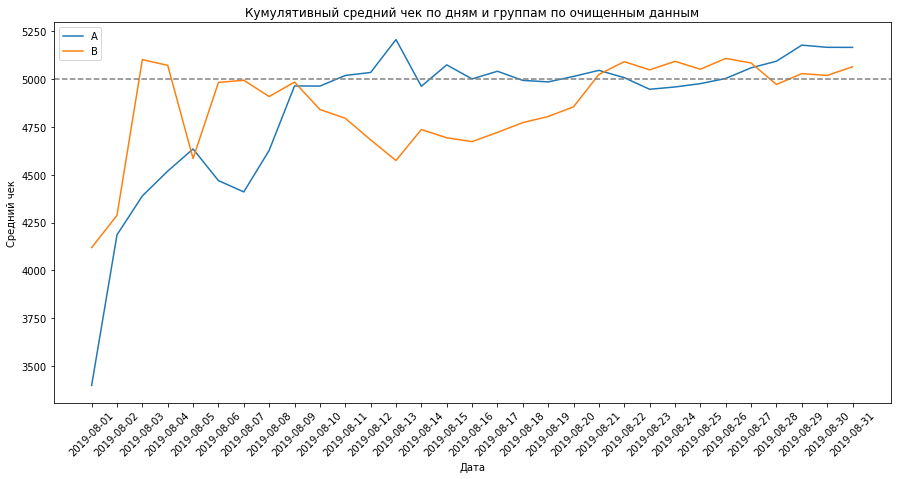

In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
clear_cumulativeRevenueA = clear_cumulativeData[clear_cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
clear_cumulativeRevenueB = clear_cumulativeData[clear_cumulativeData['group']=='B'][['date','revenue', 'orders']]

fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.plot(clear_cumulativeRevenueA['date'], clear_cumulativeRevenueA['revenue']/clear_cumulativeRevenueA['orders'], label='A')
plt.plot(clear_cumulativeRevenueB['date'], clear_cumulativeRevenueB['revenue']/clear_cumulativeRevenueB['orders'], label='B')
ax.set_title('Кумулятивный средний чек по дням и группам по очищенным данным')
ax.set(xlabel='Дата', ylabel='Средний чек')
plt.axhline(y=5000, color='gray', linestyle='--')
plt.legend();

Несмотря на сильные колебания графиков в первую половину теста даже на очищенных данных, после 2019-08-20 различий в среднем чеке почти нет. Но 10 дней - недостаточный срок, чтобы точно это утверждать. Однако, для обоих групп видна тенденция к росту среднего чека :)

Построим график кумулятивной выручки по дням и группам по очищенным данным:

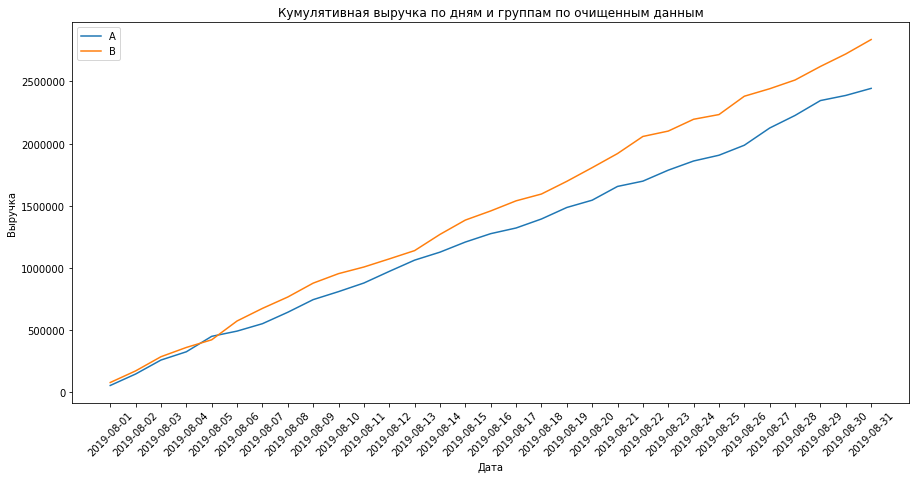

In [27]:
fig, ax = pyplot.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
# Строим график выручки группы А
plt.plot(clear_cumulativeRevenueA['date'], clear_cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(clear_cumulativeRevenueB['date'], clear_cumulativeRevenueB['revenue'], label='B')

ax.set_title('Кумулятивная выручка по дням и группам по очищенным данным')
ax.set(xlabel='Дата', ylabel='Выручка')
plt.legend(); 

На очищенных данных видно, что в обоих группах выручка равномерно растет и отличий между группами нет.  

###  Шаг 3. Выводы и рекомендации <a id="step3"></a>   


**Имеющиеся факты**:
-  при применении **ICE** и **RICE** в топ-3 самых приоритетных гипотезы у каждого фреймворка выявили 2 общих гипотезы : 
        -'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
        -'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- Есть статистически значимые различия по конверсии между группами и по «сырым», и по очищенным данным - конверсия группы B выше;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым» данным, ни по данным после фильтрации аномалий;
- График различия среднего чека говорит о том, что результаты группы B лучше группы A, однако график колеблется и сделать по нему определенные выводы нельзя. График по очищенным данным колеблется гораздо меньше, но чтобы сделать по нему однозначные выводы нужно чуть больше времени. Однако, для обоих групп видна тенденция к росту среднего чека :)
- В очищенных данных для обоих групп характерен стабильный рост выручки.


**Вывод:**

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать отсутствие различий между группами. 